In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Part 1: Prepare the Data

In [2]:
file = Path('D:\GT-VIRT-DATA-PT-03-2022-U-LOL\Myopia_Clusters\Resources\myopia.csv')

In [3]:
df = pd.read_csv(file)

In [4]:
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [5]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [7]:
df['MYOPIC'].unique()

array([1, 0], dtype=int64)

In [8]:
labels=df['MYOPIC']

In [9]:
labels.value_counts().nunique()

2

In [10]:
df.shape

(618, 15)

In [11]:
# A list of the columns from the original DataFrame
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AGE','SPHEQ', 'AL', 'ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']])

In [13]:
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [14]:
# Create a DataFrame with the transformed data

In [15]:
new_df=pd.DataFrame(data=scaled_data, columns=df.columns[1:])
new_df['MYOPIC']=df['MYOPIC']
new_df.head(2)

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,0


In [16]:
X= new_df.drop(['MYOPIC'], axis=1)

In [17]:
X.head(2)

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138


In [18]:
y=df['MYOPIC']

In [19]:
y.unique()

array([1, 0], dtype=int64)

### Part 2: Apply Dimensionality Reduction

In [20]:
# Initialize PCA model
pca = PCA(n_components=0.9)

In [21]:
# Get 3 principal components for the data.
shopping_pca = pca.fit_transform(scaled_data)

In [22]:
shopping_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [23]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [24]:
# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
tsne_features = tsne.fit_transform(shopping_pca)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.006s...
[t-SNE] Computed neighbors for 618 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.434700
[t-SNE] KL divergence after 2500 iterations: 2.234254


In [25]:
tsne_features.shape

(618, 3)

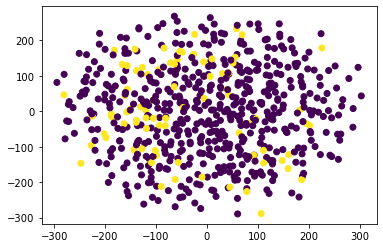

In [26]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c= labels)
plt.show()

Sample Analysis

In [27]:
# Initialize PCA model
pca1 = PCA(n_components=3)

In [28]:
# Get 3 principal components for the data.
shopping_pca1 = pca1.fit_transform(new_df)

In [29]:
shopping_pca1 

array([[ 0.54001906,  1.15458922,  0.8403463 ],
       [-0.63783513, -1.55641684,  0.21977504],
       [-0.92482517, -0.73357799, -0.10599713],
       ...,
       [-0.9037529 , -2.29034512, -0.47606322],
       [-1.11514122,  0.4364075 ,  0.41277173],
       [-0.70600687, -0.716964  ,  0.90021935]])

In [30]:
# Transform PCA data to a DataFrame
df_pca1=pd.DataFrame(data = shopping_pca1,columns=['prin 1', 'prin 2',  'prin 3'])

In [31]:
df_pca1

,prin 1,prin 2,prin 3
0,0.540019,1.154589,0.840346
1,-0.637835,-1.556417,0.219775
2,-0.924825,-0.733578,-0.105997
3,0.111079,1.201133,-0.880324
4,-0.378380,-2.855569,0.659721
...,...,...,...
613,-0.207867,1.116545,2.020084
614,-0.662127,-1.777939,0.433874
615,-0.903753,-2.290345,-0.476063
616,-1.115141,0.436407,0.412772


In [32]:
# Fetch the explained variance
pca1.explained_variance_ratio_

array([0.22614916, 0.16717857, 0.09139276])

In [33]:
# Results colored by target value
# plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

In [34]:
inertia = []

In [35]:
k = list(range(1,11))
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(shopping_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\khanh.le.BOD-KHANHLM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


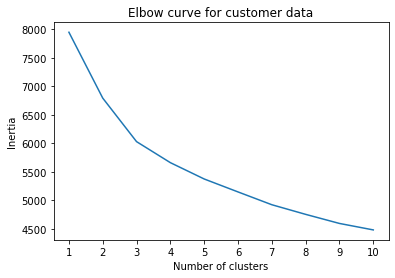

In [36]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [37]:
len(pca.components_)

10

Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data. The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

In [38]:
columns=[]
for i in range(len(pca.components_)):
        columns.append(i+1)
pca_df = pd.DataFrame(shopping_pca,  columns= columns)
pca_df['class'] = km.labels_
pca_df.head()
                            

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


## Analyzing Clusters with the Best Value of k

In [39]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

In [40]:
model.fit(pca_df)

KMeans(n_clusters=3, random_state=0)

In [41]:
# Predict clusters
predictions = model.predict(pca_df)

In [42]:
# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_

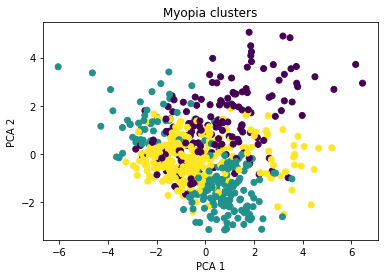

In [43]:
 #Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()